In [1]:
# Goal: Compare the [OIII] feature with comparison transients
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds
import snelib19odp.utils as utils
import snelib19odp.transient as transient

In [22]:
sds_19odp = specds.load_dataset('SN2019odp')
sds_08d = specds.load_dataset('SN2008D')
sds_13bvn = specds.load_dataset('iPTF13bvn')
sds_02ap = specds.load_dataset('SN2002ap')
sds_98bw = specds.load_dataset('SN1998bw')

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
../lib/snelib19odp/speccal.py:43: RuntimeWarning: invalid value encountered in double_scalars
  pivot_factor2 = np.trapz(spec['obswave']*filter_response_interp, spec['obswave'])/np.trapz(filter_response_interp/spec['obswave'], spec['obswave'])
../lib/snelib19odp/speccal.py:45: RuntimeWarning: invalid value encountered in double_scalars
  spec_flux = np.trapz(spec['obswave']*flux_fixed*filter_response_interp, spec['obswave'])/np.trapz(spec['obswave']*filter_response_interp, spec['obswave'])


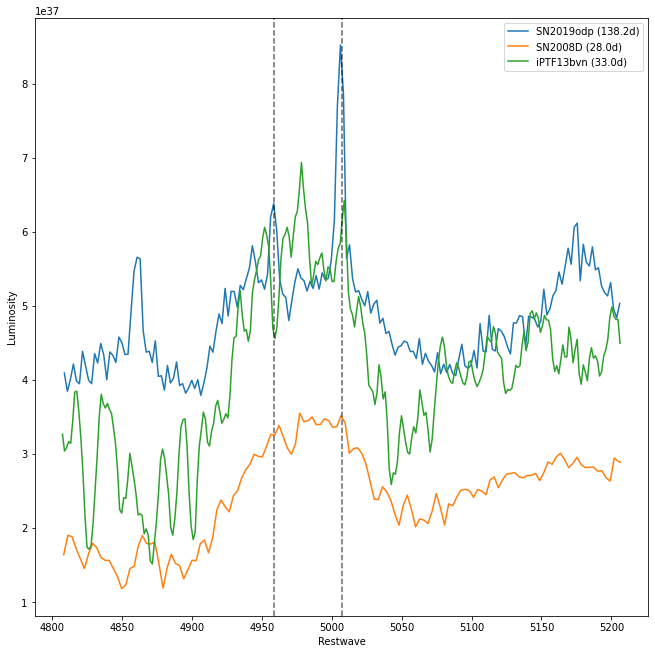

In [70]:
def plot_spec(sds, spec_name):
    spec = sds[spec_name]
    wave = spec['restwave']
    flux = spec['flux']
    t_name = sds.transient.name
    
    dist_cm = transient.load_transient(t_name).dist_mpc * u.Mpc.to(u.cm)
    lums = utils.flux2luminosity(flux, dist_cm)
    idx = np.abs(wave-5007) < 200
    plt.plot(wave[idx], lums[idx], label=f'{sds.name} ({spec.meta["phase"]:.1f}d)')

plt.figure(figsize=(11,11))
plot_spec(sds_19odp, 'ZTF19abqwtfu_20200124_Keck1_v1')
#plot_spec(sds_08d, sds_08d.specs[43].meta['name'])
plot_spec(sds_08d, sds_08d.specs[38].meta['name'])
plot_spec(sds_13bvn, sds_13bvn.specs[23].meta['name'])

plt.axvline(5007, ls='--', color='black', alpha=0.6)
plt.axvline(4959, ls='--', color='black', alpha=0.6)

plt.ylabel('Luminosity')
plt.xlabel('Restwave')
plt.legend()

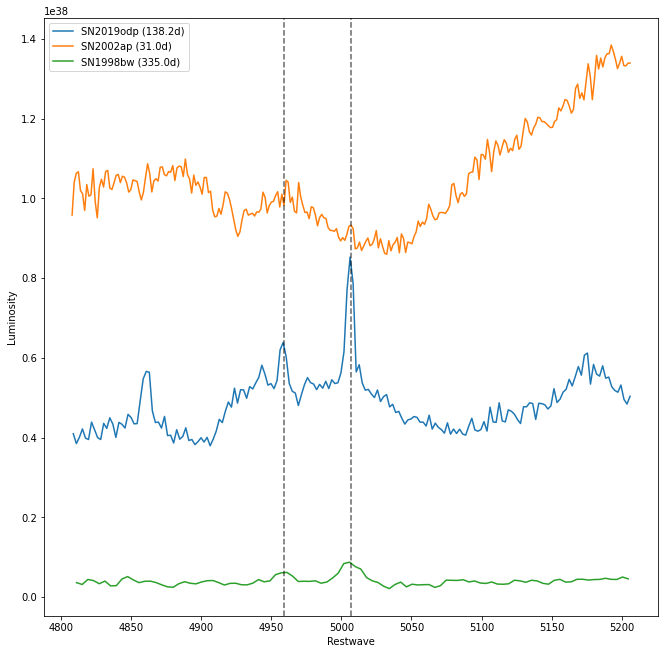

In [38]:
def plot_spec(sds, spec_name):
    spec = sds[spec_name]
    wave = spec['restwave']
    flux = spec['flux']
    t_name = sds.transient.name
    
    dist_cm = transient.load_transient(t_name).dist_mpc * u.Mpc.to(u.cm)
    lums = utils.flux2luminosity(flux, dist_cm)
    idx = np.abs(wave-5007) < 200
    plt.plot(wave[idx], lums[idx], label=f'{sds.name} ({spec.meta["phase"]:.1f}d)')

plt.figure(figsize=(11,11))
plot_spec(sds_19odp, 'ZTF19abqwtfu_20200124_Keck1_v1')
plot_spec(sds_02ap, sds_02ap.specs[32].meta['name'])
plot_spec(sds_98bw, sds_98bw.specs[27].meta['name'])

plt.axvline(5007, ls='--', color='black', alpha=0.6)
plt.axvline(4959, ls='--', color='black', alpha=0.6)

plt.ylabel('Luminosity')
plt.xlabel('Restwave')
plt.legend()

# sds_08d.specs[42].meta

In [45]:
sds_13bvn.specs[23].meta

OrderedDict([('time', 56510.0),
             ('phase', 33.0),
             ('filename', 'iPTF13bvn_06augflxc.dat'),
             ('file_name', 'iPTF13bvn_06augflxc.dat'),
             ('obs_mjd', 56510.0),
             ('name', 'iPTF13bvn_06augflxc')])

In [12]:
sds_02ap.specs[26].meta

OrderedDict([('time', 52329.0),
             ('phase', 16.0),
             ('filename', '2002ap_20020224_4058_7736_00.dat'),
             ('file_name', '2002ap_20020224_4058_7736_00.dat'),
             ('obs_mjd', 52329.0),
             ('name', '2002ap_20020224_4058_7736_00')])

In [24]:
sds_98bw.specs[20].meta

OrderedDict([('time', 50994.0),
             ('phase', 49.0),
             ('filename', '1998bw_19980630_9427_25468_00.dat'),
             ('file_name', '1998bw_19980630_9427_25468_00.dat'),
             ('obs_mjd', 50994.0),
             ('name', '1998bw_19980630_9427_25468_00')])